In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
# from sklearn.compose import make_column_transformer


# MODELS

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import Support Vector Machines
from sklearn.svm import SVC 

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier


# MODEL EVAUATION

# Import train_test_split 
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Import precision score
from sklearn.metrics import precision_score

# Import recall_score
from sklearn.metrics import recall_score

# Import roc_curve
from sklearn.metrics import roc_curve

# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Import f1_score
from sklearn.metrics import f1_score

# Model Tuning
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Import RandomizedSearchCV (Handy if the Hyperparameter Grid gets larger)
from sklearn.model_selection import RandomizedSearchCV

In [2]:
telco = pd.read_csv('Churn.csv')

## Exploratory Data Analysis

In [3]:
telco.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [4]:
telco.dtypes
#telco.info()

Account_Length      int64
Vmail_Message       int64
Day_Mins          float64
Eve_Mins          float64
Night_Mins        float64
Intl_Mins         float64
CustServ_Calls      int64
Churn              object
Intl_Plan          object
Vmail_Plan         object
Day_Calls           int64
Day_Charge        float64
Eve_Calls           int64
Eve_Charge        float64
Night_Calls         int64
Night_Charge      float64
Intl_Calls          int64
Intl_Charge       float64
State              object
Area_Code           int64
Phone              object
dtype: object

In [5]:
 telco.describe() 

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000


In [6]:
 # How many churners does the dataset have, and how many non-churners?
telco['Churn'].value_counts()

no     2850
yes     483
Name: Churn, dtype: int64

In [7]:
print(telco.groupby(['Churn']).mean()) 

       Account_Length  Vmail_Message    Day_Mins    Eve_Mins  Night_Mins  \
Churn                                                                      
no         100.793684       8.604561  175.175754  199.043298  200.133193   
yes        102.664596       5.115942  206.914079  212.410145  205.231677   

       Intl_Mins  CustServ_Calls   Day_Calls  Day_Charge   Eve_Calls  \
Churn                                                                  
no     10.158877        1.449825  100.283158   29.780421  100.038596   
yes    10.700000        2.229814  101.335404   35.175921  100.561077   

       Eve_Charge  Night_Calls  Night_Charge  Intl_Calls  Intl_Charge  \
Churn                                                                   
no      16.918909   100.058246      9.006074    4.532982     2.743404   
yes     18.054969   100.399586      9.235528    4.163561     2.889545   

        Area_Code  
Churn              
no     437.074737  
yes    437.817805  


Churners seem to make more customer service calls than non-churners. (CustServ_Calls)

In [8]:
print(telco.groupby(['Churn']).std())

       Account_Length  Vmail_Message   Day_Mins   Eve_Mins  Night_Mins  \
Churn                                                                    
no           39.88235      13.913125  50.181655  50.292175   51.105032   
yes          39.46782      11.860138  68.997792  51.728910   47.132825   

       Intl_Mins  CustServ_Calls  Day_Calls  Day_Charge  Eve_Calls  \
Churn                                                                
no      2.784489        1.163883  19.801157    8.530835  19.958414   
yes     2.793190        1.853275  21.582307   11.729710  19.724711   

       Eve_Charge  Night_Calls  Night_Charge  Intl_Calls  Intl_Charge  \
Churn                                                                   
no       4.274863    19.506246      2.299768    2.441984     0.751784   
yes      4.396762    19.950659      2.121081    2.551575     0.754152   

       Area_Code  
Churn             
no     42.306156  
yes    42.792270  


In [9]:
# Count the number of churners and non-churners by State
churn_by_st = pd.crosstab(telco.State, telco.Churn, normalize=False)

In [10]:
churn_by_st['percentage'] = churn_by_st['yes']*100 / (churn_by_st['yes'] + churn_by_st['no'])

In [11]:
churn_by_st.sort_values(by = 'percentage', ascending=False)

Churn,no,yes,percentage
State,,,
NJ,50,18,26.470588
CA,25,9,26.470588
TX,54,18,25.000000
MD,53,17,24.285714
SC,46,14,23.333333
MI,57,16,21.917808
MS,51,14,21.538462
NV,52,14,21.212121
WA,52,14,21.212121


California, New Jersey and Texas has a higher number (and percentage) of customers who churned.

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Account_Length', ylabel='Density'>

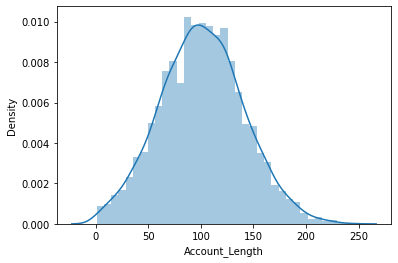

In [12]:
#Visualise the distribution of account lenghts
sns.distplot(telco['Account_Length'])

In [13]:
# Count the number of churners and non-churners by State
print(telco.groupby('State')['Churn'].value_counts())

State  Churn
AK     no       49
       yes       3
AL     no       72
       yes       8
AR     no       44
                ..
WI     yes       7
WV     no       96
       yes      10
WY     no       68
       yes       9
Name: Churn, Length: 102, dtype: int64


<AxesSubplot:xlabel='Churn', ylabel='Account_Length'>

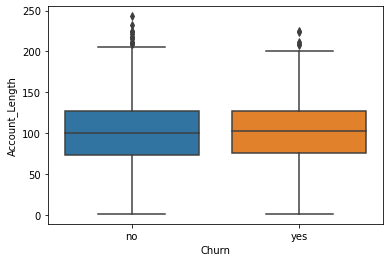

In [14]:
#Visualize the differences in account length between churners and non-churners.
sns.boxplot(x ='Churn', 
            y = 'Account_Length',
            data = telco)

 There doesn't appear to be any noticeable difference in account length.

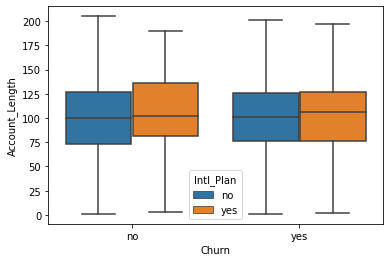

In [15]:
#Does the International Plan feature have an impact on account length or churn ?
# Create the box plot
sns.boxplot(x = 'Churn',
            y = 'Account_Length',
            data = telco,
            #remove the outliers
            sym = "",
            hue = 'Intl_Plan') 

# Display the plot
plt.show()

There doesn't appear to be any noticeable difference in account length.

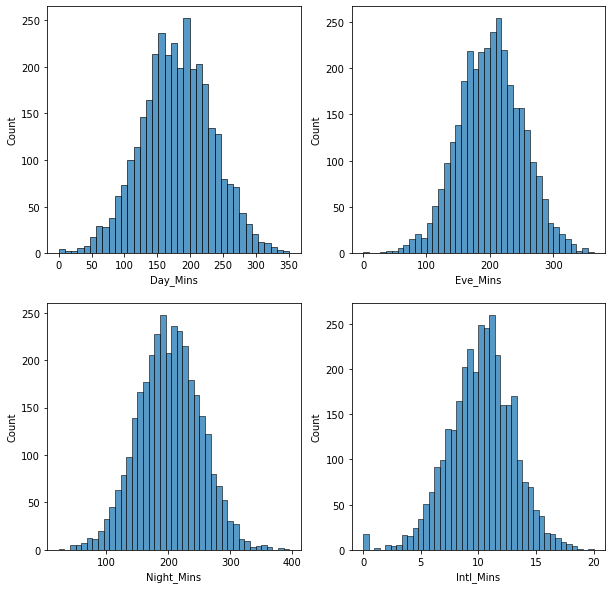

In [16]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

axes = {ax1:['Day_Mins',"Day"], ax2:['Eve_Mins',"Eve"],ax3:['Night_Mins',"Night"],ax4:['Intl_Mins',"Int"]}


for x in axes:
    k = axes[x]
    freq = k[0]
    title = k[1]
    sns.histplot(telco[freq],ax = x)

All of these features appear to be well approximated by the normal distribution. If this were not the case, we would have to consider applying a feature transformation of some kind.

There's not much of a difference in account lengths between churners and non-churners, but that there is a difference in the number of customer service calls left by churners.

Do customers who have international plans make more customer service calls? 
Or do they tend to churn more? How about voicemail plans? 

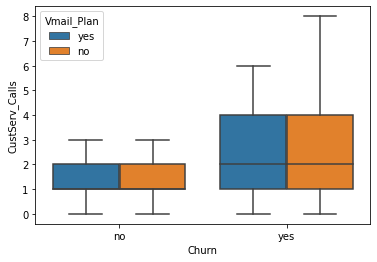

In [17]:
#Does having a voice mail plan affect the number of customer service calls or churn?

# Create the box plot
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco,
            #remove the outliers
            sym = "",
            hue = 'Vmail_Plan') 

# Display the plot
plt.show()

There isn't much difference.

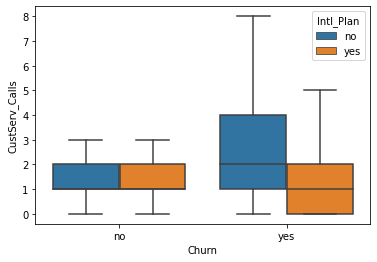

In [18]:
#Does having an international plan affect the number of customer service calls or churn?
# Create the box plot
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco,
            #remove the outliers
            sym = "",
            hue = 'Intl_Plan') 

# Display the plot
plt.show()

Customers who do churn end up leaving more customer service calls, unless these customers also have an international plan, in which case they leave fewer customer service calls.

## Data Preprocessing

In [19]:
print(telco.dtypes)

# Print the number of unique values in each telco column
print(telco.nunique())

Account_Length      int64
Vmail_Message       int64
Day_Mins          float64
Eve_Mins          float64
Night_Mins        float64
Intl_Mins         float64
CustServ_Calls      int64
Churn              object
Intl_Plan          object
Vmail_Plan         object
Day_Calls           int64
Day_Charge        float64
Eve_Calls           int64
Eve_Charge        float64
Night_Calls         int64
Night_Charge      float64
Intl_Calls          int64
Intl_Charge       float64
State              object
Area_Code           int64
Phone              object
dtype: object
Account_Length     212
Vmail_Message       46
Day_Mins          1667
Eve_Mins          1611
Night_Mins        1591
Intl_Mins          162
CustServ_Calls      10
Churn                2
Intl_Plan            2
Vmail_Plan           2
Day_Calls          119
Day_Charge        1667
Eve_Calls          123
Eve_Charge        1440
Night_Calls        120
Night_Charge       933
Intl_Calls          21
Intl_Charge        162
State               51
Are

#### Separate numerical and categorical columns

In [20]:
# Store Phone and Churn column names
phone = ['Phone']
target = ['Churn']
unnecessary = ['Area_Code']

# Store categorical column names
categorical = telco.nunique()[telco.nunique() < 5].keys().tolist()
categorical.append('State')
categorical.remove(unnecessary[0])

# Remove target from the list of categorical variables
categorical.remove(target[0])

# Store numerical column names
numerical = [x for x in telco.columns if x not in phone + target + categorical + unnecessary]

In [21]:
print(categorical)
print('\n')
print(numerical)

['Intl_Plan', 'Vmail_Plan', 'State']


['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins', 'CustServ_Calls', 'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls', 'Night_Charge', 'Intl_Calls', 'Intl_Charge']


#### One hot encoding

In [22]:
# Perform one-hot encoding to categorical variables 
telco = pd.get_dummies(data = telco, columns = categorical, drop_first=True)

In [23]:
telco = telco.rename(columns = {'Intl_Plan_yes' : 'Intl_Plan', 'Vmail_Plan_yes' : 'Vmail_Plan'})

In [24]:
telco['Churn'] = telco['Churn'].replace({'yes': 1, 'no': 0})

In [25]:
telco['Churn']

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: Churn, Length: 3333, dtype: int64

##### Scaling numerical features

In [26]:
# Initialize StandardScaler instance
scaler = StandardScaler()

# Fit and transform the scaler on numerical columns
scaled_numerical = scaler.fit_transform(telco[numerical])

# Build a DataFrame from scaled_numerical
scaled_numerical = pd.DataFrame(scaled_numerical, columns=numerical)

In [27]:
scaled_numerical.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
0,0.676489,1.234883,1.566767,-0.070610,0.866743,-0.085008,-0.427932,0.476643,1.567036,-0.055940,-0.070427,-0.465494,0.866029,-0.601195,-0.085690
1,0.149065,1.307948,-0.333738,-0.108080,1.058571,1.240482,-0.427932,1.124503,-0.334013,0.144867,-0.107549,0.147825,1.059390,-0.601195,1.241169
2,0.902529,-0.591760,1.168304,-1.573383,-0.756869,0.703121,-1.188218,0.675985,1.168464,0.496279,-1.573900,0.198935,-0.755571,0.211534,0.697156
3,-0.428590,-0.591760,2.196596,-2.742865,-0.078551,-1.303026,0.332354,-1.466936,2.196759,-0.608159,-2.743268,-0.567714,-0.078806,1.024263,-1.306401
4,-0.654629,-0.591760,-0.240090,-1.038932,-0.276311,-0.049184,1.092641,0.626149,-0.240041,1.098699,-1.037939,1.067803,-0.276562,-0.601195,-0.045885


In [28]:
telco = telco.drop(columns=numerical, axis = 1)

In [29]:
telco = telco.merge(right = scaled_numerical, 
            how = 'left',
            left_index = True,
            right_index = True
           )

## Feature selection & Feature Engineering

In [30]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Churn           3333 non-null   int64  
 1   Area_Code       3333 non-null   int64  
 2   Phone           3333 non-null   object 
 3   Intl_Plan       3333 non-null   uint8  
 4   Vmail_Plan      3333 non-null   uint8  
 5   State_AL        3333 non-null   uint8  
 6   State_AR        3333 non-null   uint8  
 7   State_AZ        3333 non-null   uint8  
 8   State_CA        3333 non-null   uint8  
 9   State_CO        3333 non-null   uint8  
 10  State_CT        3333 non-null   uint8  
 11  State_DC        3333 non-null   uint8  
 12  State_DE        3333 non-null   uint8  
 13  State_FL        3333 non-null   uint8  
 14  State_GA        3333 non-null   uint8  
 15  State_HI        3333 non-null   uint8  
 16  State_IA        3333 non-null   uint8  
 17  State_ID        3333 non-null   u

In [31]:
#Drop the unnecessary features
#Drop the unique identifiers
telco = telco.drop(['Area_Code', 'Phone'], axis = 1)

In [32]:
telco.columns

Index(['Churn', 'Intl_Plan', 'Vmail_Plan', 'State_AL', 'State_AR', 'State_AZ',
       'State_CA', 'State_CO', 'State_CT', 'State_DC', 'State_DE', 'State_FL',
       'State_GA', 'State_HI', 'State_IA', 'State_ID', 'State_IL', 'State_IN',
       'State_KS', 'State_KY', 'State_LA', 'State_MA', 'State_MD', 'State_ME',
       'State_MI', 'State_MN', 'State_MO', 'State_MS', 'State_MT', 'State_NC',
       'State_ND', 'State_NE', 'State_NH', 'State_NJ', 'State_NM', 'State_NV',
       'State_NY', 'State_OH', 'State_OK', 'State_OR', 'State_PA', 'State_RI',
       'State_SC', 'State_SD', 'State_TN', 'State_TX', 'State_UT', 'State_VA',
       'State_VT', 'State_WA', 'State_WI', 'State_WV', 'State_WY',
       'Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Day_Calls', 'Day_Charge', 'Eve_Calls',
       'Eve_Charge', 'Night_Calls', 'Night_Charge', 'Intl_Calls',
       'Intl_Charge'],
      dtype='object')

## Modeling

We'll predict the customer churn.
Supervised machine learning with historical data

In [33]:
features = telco.columns.tolist()
features.remove('Churn')

In [50]:
# Create feature variable
X = telco[features]

# Create target variable
y = telco['Churn']

#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Varying training set size

The size of your training and testing sets influences model performance. Models learn better when they have more training data. However, there's a risk that they overfit to the training data and don't generalize well to new data, so in order to properly evaluate the model's ability to generalize, you need enough testing data. As a result, there is a important balance and trade-off involved between how much you use for training and how much you hold for testing.

In [48]:
print(len(X_train), len(X_test))

2666 667


Which model to use ?

- Logistic Regression
- Decision Tree
- Support vector machines
- Random forests

In [75]:
# Initialize the model
lr = LogisticRegression()

# Fit the model on the training data
lr.fit(X_train, y_train)

# Predict the values on the testing data
y_pred = lr.predict(X_test)

In [77]:
# Measuring model accuracy
accuracy = lr.score(X_test, y_test)
print(accuracy)

# Measuring model precision
precision = precision_score(y_test, y_pred)
print(precision)

## Measuring model recall
recall = recall_score(y_test, y_pred)
print(recall)

0.856071964017991
0.5806451612903226
0.1782178217821782


In [85]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

# Predict the values on the testing data
y_pred = dtc.predict(X_test)

In [86]:
# Measuring model accuracy
accuracy_dtc = dtc.score(X_test, y_test)
print(accuracy_dtc)

# Measuring model precision
precision_dtc = precision_score(y_test, y_pred)
print(precision_dtc)

## Measuring model recall
recall_dtc = recall_score(y_test, y_pred)
print(recall_dtc)

0.9280359820089955
0.7731958762886598
0.7425742574257426


In [83]:
# Initialize the model
svc = SVC()

svc.fit(X_train, y_train)

# Predict the values on the testing data
y_pred = svc.predict(X_test)

In [84]:
# Measuring model accuracy
accuracy_svc = svc.score(X_test, y_test)
print(accuracy_svc)

# Measuring model precision
precision_svc = precision_score(y_test, y_pred)
print(precision_svc)

## Measuring model recall
recall_svc = recall_score(y_test, y_pred)
print(recall_svc)

0.9175412293853074
0.96
0.4752475247524752


In [94]:
# Initialize the model
rf = RandomForestClassifier()

# Fit the model on the training data
rf.fit(X_train, y_train)

# Predict the values on the testing data
y_pred = rf.predict(X_test)

In [95]:
# Measuring model accuracy
accuracy_rf = rf.score(X_test, y_test)
print(accuracy_rf)

# Measuring model precision
precision_rf = precision_score(y_test, y_pred)
print(precision_rf)

## Measuring model recall
recall_rf = recall_score(y_test, y_pred)
print(recall_rf)

0.9370314842578711
1.0
0.5841584158415841


Random Forest has a higher accuracy. 

In [49]:
telco['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

But accuracy is not a useful measure in our case. Because our dataset is imbalanced.

In our churn dataset, there are nearly 6 times as many non-churners as there are churners. Imbalanced 

This can have an impact on the performance of our model as it might learn to always predict the majority class - in this case, that the customer will not churn. There are techniques such as upsampling and downsampling that you can use to balance the classes.

For our purposes, what this means is that when working with imbalanced classes, accuracy is not a very useful metric.This creates the need for metrics that are more nuanced. So we calculate precision and recall scores.

RF model has the highest precision score and recall score.

In [68]:
#Print the confusion matrix
#print(confusion_matrix(y_test, y_pred))

Both precision and recall are important metrics, and depending on how the business is trying to model churn, you may want to focus on optimizing one over the other. 

Often, stakeholders are interested in a single metric that can quantify model performance. The AUC is one metric you can use in these cases, and another is the F1 score.

### ROC Curve

F1 Score for Logistic Regression model is 0.2727272727272727
F1 Score for Support Vector Vachines model is 0.6357615894039734
F1 Score for Decision Tree model is 0.7551020408163266
F1 Score for Random Forest model is 0.728395061728395


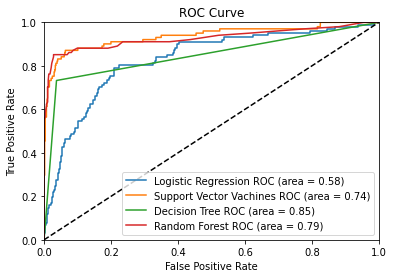

In [111]:
# Add the models to the list that we want to view on the ROC plot

models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(),
},
{
    'label': 'Support Vector Machines',
    'model': SVC(probability=True),
},
{
    'label': 'Decision Tree',
    'model': DecisionTreeClassifier(),
},
    {
    'label': 'Random Forest',
    'model': RandomForestClassifier(),
}
]

# Below for loop iterates through our models list

for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
    
    # Compute False positive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    # Calculate the AUC score
    auc = roc_auc_score(y_test,model.predict(X_test))   
    # Plot the computed AUC scores
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
    # Calculate the F1 Score
    print('F1 Score for', m['label'],'model is', f1_score(y_test, y_pred))
    
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

AUC scores (as well as F1 scores) indicate that Decision Tree, Random Forest and Support Vector Machines are well performing models in our case.

# Model Tuning

In [66]:
# 1. Grid Search

# Create the hyperparameter grid
param_grid = {'max_features': ['auto', 'sqrt', 'log2']}

# Call GridSearchCV
grid_search = GridSearchCV(rf, param_grid)

# Fit the model
grid_search.fit(X, y)

# Print the optimal parameters
print(grid_search.best_params_)

{'max_features': 'sqrt'}


In [58]:
# Create the hyperparameter grid
param_grid2 = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Call GridSearchCV
grid_search2 = GridSearchCV(rf, param_grid2)

# Fit the model
grid_search2.fit(X,y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, None], 'max_features': [1, 3, 10]})

In [59]:
grid_search2.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 10}

In [79]:
# 2. Feature importances (Which features are important in driving churn)
importances = rf.feature_importances_

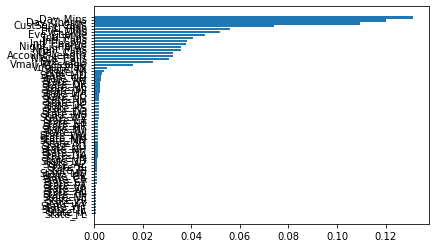

In [80]:
# Sort importances
sorted_index = np.argsort(importances)

# Create labels
labels = X.columns[sorted_index]

# Clear current plot
plt.clf()

# Create plot
plt.barh(range(X.shape[1]), importances[sorted_index], tick_label=labels)
plt.show()

The plot tells us that CustServ_Calls, Day_Mins and Day_Charge are the most important drivers of churn. What if we added additional sources of data and more features?

6 new features have been added to the telco DataFrame:

Region_Code
Cost_Call
Total_Charge
Total_Minutes
Total_Calls
Min_Call